(ref:lec3:ex2_sol)=
# Solutions of Exercise 3.2

A vehicle is characterized by the following transfer function, which relates the throttle input  $U(s)$  to the velocity  $Y(s)$,

$$
G(s) = \frac{s+10}{(s+1)^2(s+5)}
$$

We need to design a controller that regulates the speed of the vehicle.

1. Start by designing a proportional controller $F(s) = K$. For what values of $K > 0$ is the closed-loop stable? How does the closed-loop performance change when $K$ is changed?
2. Consider now $K=10$. Compute the **gain margin** $A_m$ and the **phase margin** $\varphi_m$.

```{admonition} Hint
:class: hint

To check the stability of the closed-loop transfer function $G_c(s)$, you can use the root locus (plotted with MATLAB), or the Routh-Hurwitz criterion.
```

---

## Solution

### Question 1

Since the order of the closed-loop transfer function $G_c(s) = \frac{F(s) G(s)}{1 + F(s) G(s)}$ is three, we can't easily provide an analytical solution. We therefore inspect the root locus.

In [1]:
set(groot, 'defaultLineLineWidth', 2);

In [2]:
% Check if the `asymptotic_bode` and `rlocus_arrows` functions are available, otherwise download them from the github URLs.
if ~exist('asymptotic_bode')
    urlwrite('https://raw.githubusercontent.com/bonassifabio/1RT485/refs/heads/main/book/res/matlab/asymptotic_bode.m', 'asymptotic_bode.m');
end
if ~exist('rlocus_arrows')
    urlwrite('https://raw.githubusercontent.com/bonassifabio/1RT485/refs/heads/main/book/res/matlab/rlocus_arrows.m', 'rlocus_arrow.m');
end

s = tf('s');
G =  1 * (s + 10) / ((s + 1)^2 * (s + 5));

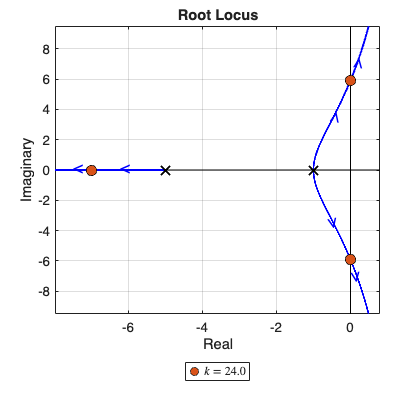

In [3]:
rlocus_arrows(G); % A convenient wrapper of rlocus that add arrows and relevant points to the root locus plot.

From the root locus, we can see that the closed-loop poles are stable for $K < 24$.

#### Alternative solution: the Routh criterion

To check the stability of $G_c(s)$ we can apply the Routh criterion as done in the {ref}`ref:lec2:ex5_sol`.

To do so, let's first compute $G_c(s)$:

$$
G_c(s) = \frac{F(s)G(s)}{1+F(s)G(s)} = \frac{\frac{K(s+10)}{(s^2 + 2s + 1)(s+5)}}{1 + \frac{K(s+10)}{(s^2 + 2s + 1)(s+5)}} = \frac{K(s+10)}{s^3 + 7s^2 + (11+ K)s + 10K + 5}
$$

The characteristic polynomial is the denominator of $G_c(s)$, i.e., $\Phi = s^3 + 7s^2 + (11 + K)s + (10K + 5)$. The Routh-Hurwitz table therefore reads

$$
\begin{array}{cc}
1 & 11 + K \\
7 & 10K + 5\\
\hline
\frac{72 - 3K}{7} & 0 \\
10 K + 5
\end{array}
$$

According to the Routh criterion, $G_c(s)$ is stable if and only if all the elements on the first column are positive. Note that $1>0$ and $7>0$ for any $K$, therefore we will omit them.

$$
\begin{dcases}
72 - 3K > 0 \\
10K + 5 > 0
\end{dcases} \quad \rightarrow \quad
\begin{dcases}
K < 24 \\
K > -0.5
\end{dcases}
$$

Therefore, $\boxed{0 < K < 24}$. Note that the lower limit has been limited to $0$ because the text of the exercise specified $K>0$.

### Question 2

#### Phase margin
Let's start by computing the **phase margin**, which is defined as

$$
\varphi_m = 180^o + \angle G_o(i \omega_c)
$$

where $G_o(s) = F(s) G(s)$ is the **open-loop transfer function** and $\omega_c$ is the **critical frequency**, that is, the frequency where the open loop transfer function has unitary amplitude, $\lvert G_o(i \omega_c) \lvert = 1$. Remember that $G_o(i \omega)$ is a complex number!

$$
G_o(s) = 10 \frac{s + 10}{(s+1)^2(s+5)}
$$

To compute $\omega_c$ we replace $s = i \omega$ for different values of $\omega$, until we find a value where the modulus of $G_o(i \omega)$ is approximately $1$.

In [4]:
Go_modulus = @(w) abs(10 * (1i * w + 10) / ((1i * w + 1)^2 * (1i * w + 5)));

Go_modulus(1)
Go_modulus(10)
Go_modulus(4)

ans = 9.8547

ans = 0.1252

ans = 0.9894

Therefore $\omega_c \approx 4$ rad/s.

```{note}
You can also find the critical frequency from the Bode diagram, as the interception between the plot of $\lvert G_o(i \omega) \lvert_{\text{dB}}$ and the 0dB axis!
```

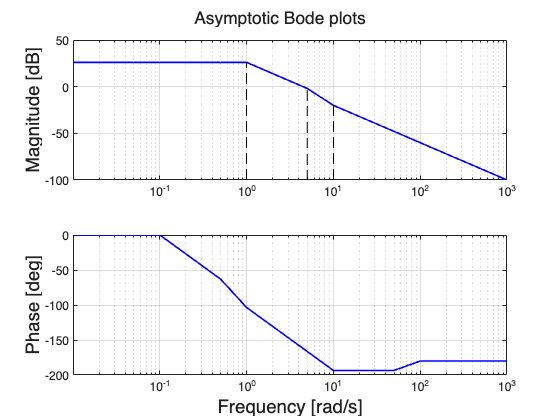

In [5]:
figure; asymptotic_bode(10 * G)

We can now evaluate the phase margin as

$$
\varphi_m = 180 + \angle G_o(i 4)
$$

In [6]:
% We create a function that computes the angle of Go given the frequency omega
% We use the mod function to convert the angle to the range [-360, 0]
Go_phase = @(w) mod(rad2deg(angle(10 * (1i * w + 10) / ((1i * w + 1)^2 * (1i * w + 5)))), 360) - 360;

phase_margin = 180 + Go_phase(4)   % Conver the angle from radians to degrees

phase_margin = 11.2141

While a phase margin of $11^\circ$ is bigger than $0^\circ$, so it is enough to guarantee the closed-loop stability, in practical applications it is too low to be accepted. 

- If $\varphi_m > 90^\circ$, the **dominant closed-loop pole** is real valued and stable.
- If $0^\circ < \varphi_m < 90^\circ$, the **dominant closed-loop poles** are complex-conjugate, with damping coefficient $\xi = \cos(\varphi_m)$, see {ref}`ref:lec1:useful_formulas`.
- If $\varphi_m \leq 0^\circ$, the system is unstable.

```{warning}
A phase margin below $30^\circ$ indicates that the dominant poles have a low damping coefficient. In general, the phase margin should be at least $45^\circ$ for adequate closed-loop performance.
```

#### Gain margin

We can then proceed computing the **gain margin**, which is defined as

$$
A_m = \frac{1}{\lvert G_o(i \omega_p) \lvert}
$$

or, in decibels,

$$
A_m = -\lvert G_o(i \omega_p) \lvert_{\text{dB}}
$$

Here $\omega_p$ is the phase crossover frequency, i.e., the frequency at which the phase plot first crosses the $-180^\circ$ axis. To find $\omega_p$ we need to solve

$$
\angle G_o(i \omega) := \varphi(0) + \sum_{i} \textrm{atan} \left( \frac{\omega}{p_i} \right) - \sum_{i} \textrm{atan} \left( \frac{\omega}{z_i} \right) = -180^\circ
$$ (eq:lec3:ex2:phase)

The initial phase $\varphi(0)$ is $0^\circ$  if the static gain is positive, decremented by $90^\circ$ for each pole in the origin and incremented by $90^\circ$ for each zero in the origin.
In {eq}`eq:lec3:ex2:phase`, $p_i$ is the $i$-th pole of $G_o(s)$ and $z_i$ is the $i$-th zero.

To compute $\omega_p$ we try replacing some candidate value until we find a value where $\angle(G_o(i \omega)) = -180^\circ$. Note that the phase might cross the $-180^\circ$ axis multiple times, and we must be sure that we get the smallest possible of such values. The easiest way to find a reasonable value is to sketch the asymptotic Bode diagram (see above).

It is apparent that the phase is crossing is somewhere between $4$ rad/s and $10$ rad/s. To find the exact value, we try evaluate $\angle G_o(i \omega)$ in that range

In [7]:
Go_phase(5)
Go_phase(7)
Go_phase(6)

ans = -175.8151

ans = -183.2101

ans = -180.3060

Therefore, $\omega_p \simeq 6$ rad/s. We can finally evaluate the gain margin as 

In [8]:
Am = 1 / Go_modulus(6)

Am = 2.4780

In [9]:
20 * log10(Am)

ans = 7.8819

The gain margin is $A_m \simeq 2.5 \simeq 7.8 \text{ dB}$. Since it is bigger than $1$ (i.e. $0$ dB), the closed-loop is stable.

We can confirm our results using MATLAB's `margin` command.

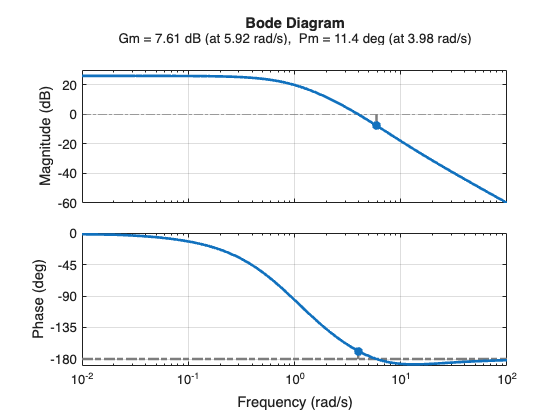

In [10]:
figure;
margin(10 * G); grid on;